<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [468]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [469]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [470]:
#Corregir mayúsculas y espacios de la Columna Species datos.
df['species']= df['species'].str.lower().str.strip()

#remplazar los valores nan por "default"

df.loc[df['species'].isnull(),'species']='default'

In [471]:
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

In [472]:


#Verificación formato de archivos

print(df['sepalLength'].dtype==float,
df['sepalWidth'].dtype==float,
df['petalLength'].dtype==float,
df['petalWidth'].dtype==float)

True True True True


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [473]:
for col in df.columns:
    df.loc[df[col].isnull(),col]=0



Text(0.5, 0, 'specie')

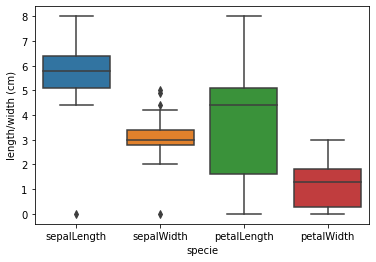

In [474]:
# Pre-format DataFrame
stats_df = df.drop(['species'], axis=1) #filtra datos sacando estás estiquetas
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)
plt.ylabel('length/width (cm)')
plt.xlabel('specie')

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [475]:
 df_largo = pd.DataFrame({
        'variable': ['sepalLength','sepalWidth','petalLength','petalWidth'],
        'min': [4,2,1,0.1],
        'max': [7,4.5,7,2.5]
    })
df_largo     #auxiliar para determinar los limites


,variable,min,max
0,sepalLength,4.0,7.0
1,sepalWidth,2.0,4.5
2,petalLength,1.0,7.0
3,petalWidth,0.1,2.5


In [476]:
resumen=pd.DataFrame()   #Creo un data Frame para almacenar valores True o False
for i in range(len(df_largo)):
    col1=df_largo.loc[i][0]    #guardo el nombre de la variable a analizar
    mini=df_largo.loc[i][1]    #valor minimo
    maxi=df_largo.loc[i][2]    #valor maximo
    cond1=stats_df[col1]>=mini #condición que verifica si el valor es mayor al minimo indicado
    cond2=stats_df[col1]<=maxi #condición que verifica si el valor es menor al maximo indicado
    resumen[col1]=cond1&cond2#pd.DataFrame({col1: cond1&cond2}) #agrego al dataframe los resultados analizados
total=resumen.astype(int).sum(axis=1)  # Resumen de las condiciones analizadas, si es menor a 4 no cumple las indicaciones 

resultado=pd.DataFrame({'label':total})    #creo un dataFrame para guardar el resultado final
resultado[resultado<4]='Fuera de Rango'    #condición para asignar valores fuera de rango
resultado[resultado==4]='En el Rango'                #valores que estan en buen rango le asigno el simbolo '-'


In [477]:
concatenar=[df,resultado]
final=pd.concat(concatenar,axis=1,sort=False)
final


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,Fuera de Rango
1,7.2,3.6,6.1,2.5,virginica,Fuera de Rango
2,6.3,3.3,6.0,2.5,virginica,En el Rango
3,6.7,3.3,5.7,2.5,virginica,En el Rango
4,6.3,3.4,5.6,2.4,virginica,En el Rango
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,En el Rango
146,4.8,3.0,1.4,0.1,setosa,En el Rango
147,4.9,3.1,1.5,0.1,setosa,En el Rango
148,4.9,3.6,1.4,0.1,setosa,En el Rango


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

In [478]:
mask1=final['label']=='Fuera de Rango' #fuera de rango
mask2=final['label']=='-' #en el rango

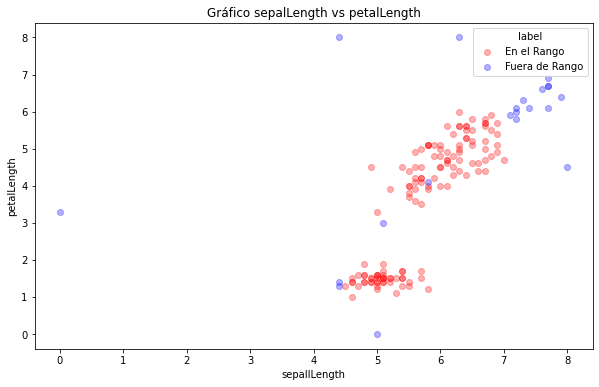

In [479]:
#Gráfico sepalLength vs petalLength 

color_map = dict(zip(final["label"].unique(), 
                     ["blue","red"]))

plt.figure(figsize=(10, 6))

for label, group in final.groupby("label"):
    plt.scatter(group["sepalLength"], 
                group["petalLength"],
                color=color_map[label],
                alpha=0.3,
                edgecolor=None,
                label=label,
               )
    
plt.legend(frameon=True, title="label")
plt.xlabel("sepallLength")
plt.ylabel("petalLength")
plt.title("Gráfico sepalLength vs petalLength" )
plt.show()


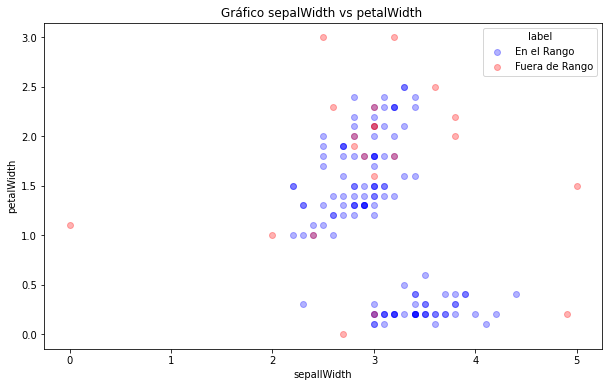

In [480]:
#Gráfico sepalWidth vs petalWidth 

color_map = dict(zip(final["label"].unique(), 
                     ["red","blue"]))

plt.figure(figsize=(10, 6))

for label, group in final.groupby("label"):
    plt.scatter(group["sepalWidth"], 
                group["petalWidth"],
                color=color_map[label],
                alpha=0.3,
                edgecolor=None,
                label=label,
               )
    
plt.legend(frameon=True,title='label')
plt.xlabel("sepallWidth")
plt.ylabel("petalWidth")
plt.title("Gráfico sepalWidth vs petalWidth ")
plt.show()


## resultados ##
Aparentemente existe una relación lineal entre las variables petalLength y sepalLength. Lo cual puede ser útil para estimar una en función de la otra.
Mientras que entre sepalWidth y petalWidth, pudiese haber una relación lineal dependiendo los anchos seleccionados, pudiendose crear una función a tramos. Sin embargo, no hay evidencia para relacionar estas variables directamente.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

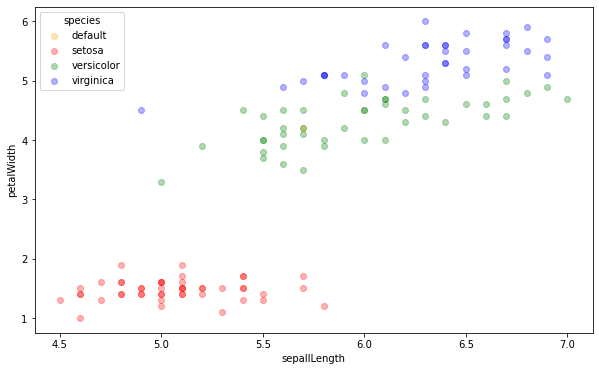

In [481]:
final2=final.loc[final['label']!='Fuera de Rango']

color_map = dict(zip(final2["species"].unique(), 
                     ["blue", "green","orange" ,"red"]))

plt.figure(figsize=(10, 6))

for species, group in final2.groupby("species"):
    plt.scatter(group["sepalLength"], 
                group["petalLength"],
                color=color_map[species],
                alpha=0.3,
                edgecolor=None,
                label=species,
               )
    
plt.legend(frameon=True, title="species")
plt.xlabel("sepallLength")
plt.ylabel("petalWidth")
plt.show()